In [1]:
# import pickle
from bot import Bot
from game_config import Config, Blackjack
# from tqdm import tqdm
# import pandas as pd

# import seaborn as sns
# import matplotlib.pyplot as plt

In [3]:
len(data)

1000000

In [4]:
x = []
y = []
z = []
a = []
b = []
c = []

In [5]:
for v in tqdm(data):
    hands = v.hands
    for hand in hands:
        if hand.player.name == 'X':
            x.append(hand.result)
        elif hand.player.name == 'Y':
            y.append(hand.result)
        elif hand.player.name == 'Z':
            z.append(hand.result)
        elif hand.player.name == 'A':
            a.append(hand.result)
        elif hand.player.name == 'B':
            b.append(hand.result)
        else:
            c.append(hand.result)

100%|██████████| 1000000/1000000 [00:19<00:00, 51381.64it/s]


In [6]:
len(x)

1028742

In [50]:
from varname import nameof

In [59]:
df_all = pd.DataFrame()

In [67]:
players = [x,y,z,a,b,c]
names = ['X','Y','Z','A','B','C']

In [70]:
for player, name in zip(players, names):
    df = pd.DataFrame(player, columns = ['result'])
    df_r = df.groupby('result').size().reset_index().rename({0:'count'},axis=1)
    df_r['player'] = name
    df_all = df_all.append(df_r)

In [73]:
df_all = df_all.reset_index(drop=True)

In [74]:
df_all.head()

,result,count,player
0,lose,493825,X
1,tie,88444,X
2,win,446473,X
3,lose,492946,Y
4,tie,88293,Y


In [77]:
sns.set()

In [139]:
df_all['result'].unique()

array(['lose', 'tie', 'win'], dtype=object)

In [156]:
def df_transform(df):
    df_out = pd.DataFrame()
    result = list(df['result'].unique())
    for v in result:
        df_out = df_out.append(df[df['result']==v].rename({'count':v},axis=1).set_index('player')[v])
    return df_out.T

In [159]:
df_t_all = df_transform(df_all)

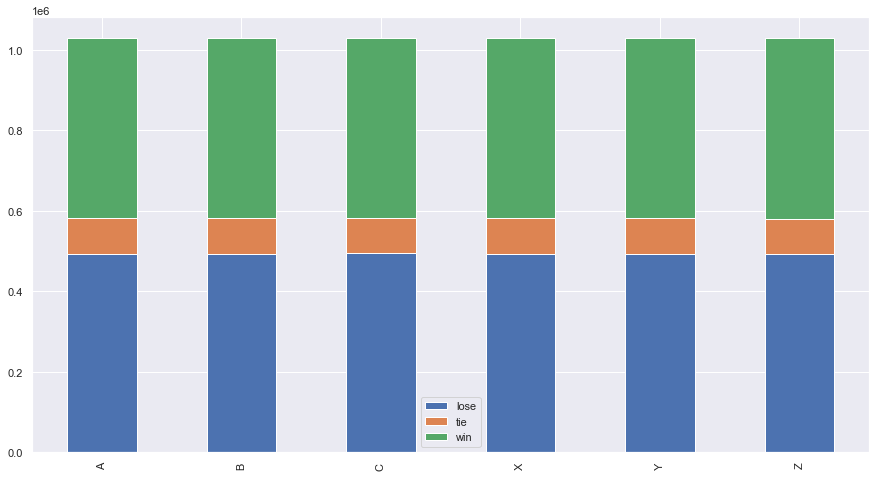

In [162]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
df_t_all.plot(kind = 'bar', ax=ax, stacked='True')

In [39]:
df_r['per'] = df_r['count']/len(x)*100

In [23]:
df_r

,x,count,per
0,lose,493825,48.002803
1,tie,88444,8.597297
2,win,446473,43.399900


In [40]:
df_r

,z,count,per
0,lose,493473,47.968587
1,tie,87300,8.486093
2,win,447709,43.520047
